# Exploratory Data Analysis (EDA) for Animal Classification Dataset

In this EDA, we analyze the dataset used for training an image classification model. The dataset consists of 10 different animal classes. The main goals of this analysis are:

To ensure the dataset is clean and well-structured.
To check for class imbalances.
To identify potential issues like duplicate images, grayscale images, and outliers.
To visualize the dataset distribution.

Firstly let's import all libraries and upload dataset.

In [39]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from glob import glob
import random

In [40]:
# Set the dataset path (update this to your dataset location)
data_dir = "dataset"

# List all image files in the dataset
image_paths = glob(os.path.join(data_dir, "*/*.jpg"))

In [41]:
# Extract class labels from folder structure
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]

# Convert image paths and labels into a DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": labels})

### 1. Display basic dataset information

In [42]:
print("Dataset size:", len(df))
print("Number of classes:", len(df['label'].unique()))
print("Class distribution:")
print(df['label'].value_counts())


Dataset size: 9842
Number of classes: 10
Class distribution:
label
kangaroo      1428
tiger         1177
elephant      1059
hedgehog       961
eagle          954
rhinoceros     918
coyote         892
chimpanzee     878
deer           818
duck           757
Name: count, dtype: int64


### 2. Checking for Duplicates
Duplicate images can lead to data leakage, biasing the model towards certain samples. If duplicates exist, the model might learn to "memorize" them instead of generalizing well.

In [43]:
duplicate_count = df.duplicated(subset=["image_path"]).sum()
print(f"Number of duplicate images: {duplicate_count}")

Number of duplicate images: 0


### 3. Analyzing File Sizes of Images

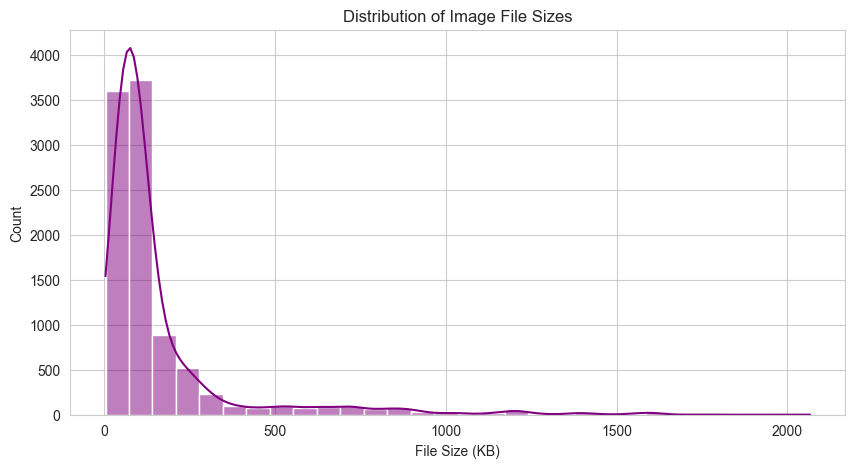

Min file size: 3.61 KB
Max file size: 2066.51 KB
Mean file size: 157.15 KB


In [44]:
# Get file sizes
file_sizes = [os.path.getsize(path) / 1024 for path in df["image_path"]]  # Convert to KB

# Plot file size distribution
plt.figure(figsize=(10, 5))
sns.histplot(file_sizes, bins=30, kde=True, color="purple")
plt.xlabel("File Size (KB)")
plt.ylabel("Count")
plt.title("Distribution of Image File Sizes")
plt.show()

# Print basic statistics about file sizes
print(f"Min file size: {min(file_sizes):.2f} KB")
print(f"Max file size: {max(file_sizes):.2f} KB")
print(f"Mean file size: {np.mean(file_sizes):.2f} KB")


### 4. Visualizing class distribution
Why check class distribution? Because if some classes have significantly more images than others, the model may be biased, and it also works in the opposite direction: if a class is underrepresented, the model may learn to classify it poorly.

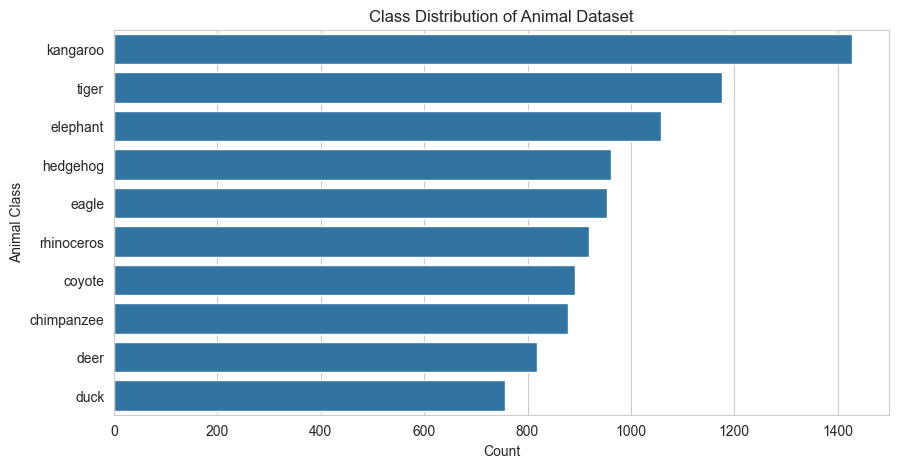

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df['label'], order=df['label'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Animal Class")
plt.title("Class Distribution of Animal Dataset")
plt.show()

### 5. Analyzing image dimensions and formats

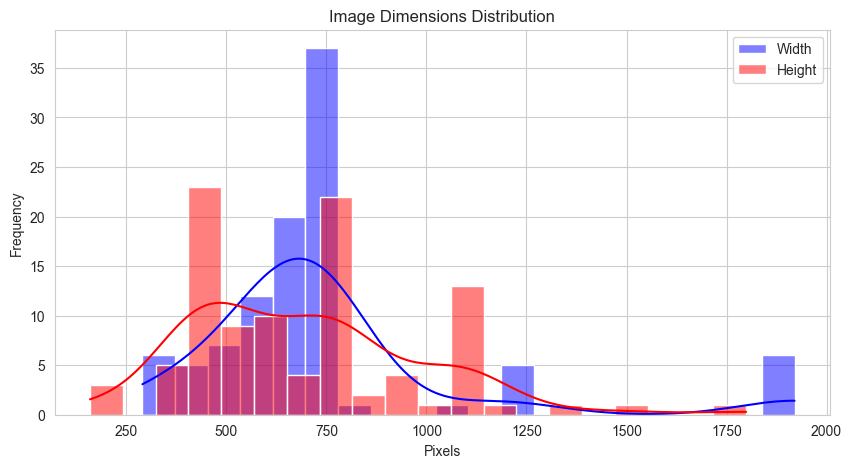

In [46]:
def get_image_stats(image_paths, sample_size=100):
    """Retrieve image width and height statistics from a sample of images."""
    widths, heights = [], []
    random_sample = random.sample(image_paths, min(sample_size, len(image_paths)))
    for path in random_sample:
        with Image.open(path) as img:
            widths.append(img.width)
            heights.append(img.height)
    return widths, heights

# Get image dimension statistics
widths, heights = get_image_stats(image_paths)

# Plot the distribution of image sizes
plt.figure(figsize=(10, 5))
sns.histplot(widths, bins=20, kde=True, label="Width", color="blue")
sns.histplot(heights, bins=20, kde=True, label="Height", color="red")
plt.legend()
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Dimensions Distribution")
plt.show()

###  6. Displaying Sample Images

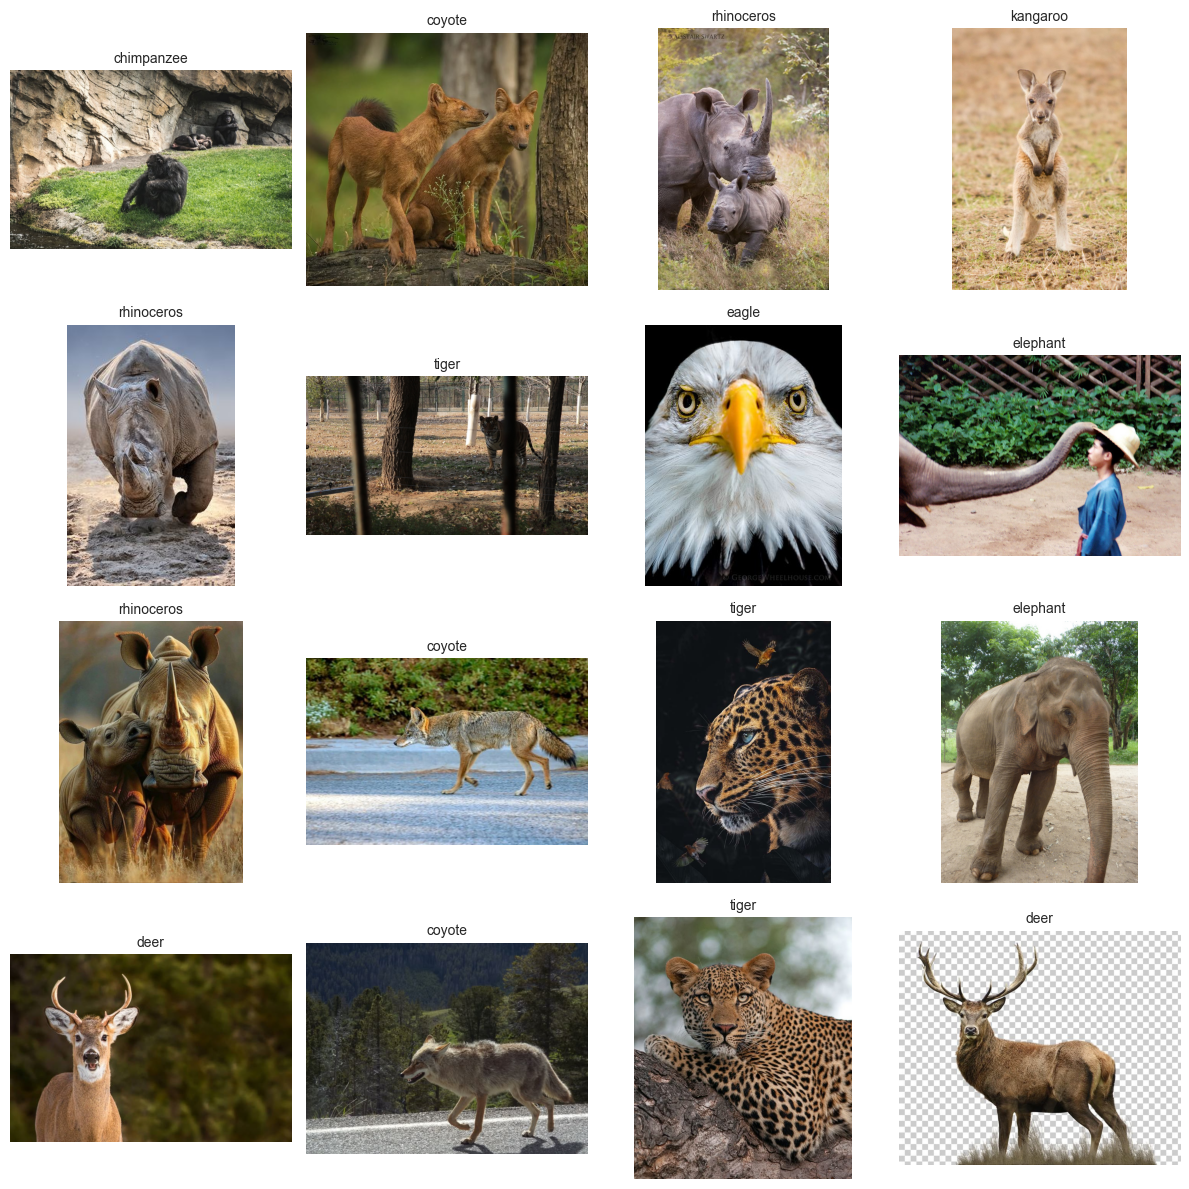

In [47]:
# Function to display sample images in a grid format
def show_sample_images(df, num_samples=16, cols=4):
    """Display a random selection of images from the dataset in a grid."""
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))  # Adjust figure size

    # Select random images
    sample_images = df.sample(num_samples).reset_index(drop=True)

    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            img = Image.open(sample_images.loc[i, "image_path"]).convert("RGB")  # Ensure RGB format
            ax.imshow(img)
            ax.set_title(sample_images.loc[i, "label"], fontsize=10)
            ax.axis("off")
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

show_sample_images(df, num_samples=16, cols=4)
